In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob

# Extract data from MISR-estimated roughness files by using MTK library. Should use python3.6 for this purpose 

## Plot Transect 

In [2]:
atm_file = "3cams_insample_atm.csv"
atm_dir = "/home/ehsan/misr_lab/MISR-SeaIceRoughness/post_processing"
atm_data_fp = os.path.join(atm_dir, atm_file)

In [3]:
transect_small = pd.read_csv(atm_data_fp)
transect_small

Unnamed: 0        lat         lon     Ca_r     Cf_r     An_r    rms
0              1  76.235487  230.712293  0.66574  1.03182  0.53599  15.24
1              2  76.235648  230.710186  0.66574  1.03182  0.53599  22.32
2              3  76.235474  230.712462  0.66574  1.03182  0.53599  17.44
3              4  76.235619  230.714797  0.66574  1.03182  0.53599  14.30
4              5  76.235781  230.712690  0.66574  1.03182  0.53599  14.95
...          ...        ...         ...      ...      ...      ...    ...
9995        9996  75.999639  230.398900  0.58862  0.95719  0.41134   5.65
9996        9997  75.999793  230.401122  0.58862  0.95719  0.41134   5.24
9997        9998  75.999951  230.399059  0.58862  0.95719  0.41134   6.27
9998        9999  76.000109  230.396997  0.58163  0.95175  0.41600   5.40
9999       10000  75.999934  230.399286  0.58862  0.95719  0.41134   6.15

[10000 rows x 7 columns]

In [4]:
transect_small = transect_small.iloc[0:10]
transect_small.iloc[0]

Unnamed: 0      1.000000
lat            76.235487
lon           230.712293
Ca_r            0.665740
Cf_r            1.031820
An_r            0.535990
rms            15.240000
Name: 0, dtype: float64

In [5]:
roughness_dir = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/roughness_predicted_from_PH"


In [18]:
# # extract MISR-estimated roughness for the same latLon locations and plot them together with ATM
# transect_from_misr = []
# for irow in range(transect_small.shape[0]): # each row==LatLon might fall in several blocks==POB, we open each block and will average all at the end
    
#     print("DF row: %s" %irow)
#     lat_lon = transect_small[['lat','lon']].iloc[irow]
#     print(lat_lon)
    
#     path_list = mtk.latlon_to_path_list(lat_lon[0], lat_lon[1])
#     print(path_list)
    
#     roughness_per_pixel_list = []
#     for path in path_list:
#         # Q- now that we have found many paths, how figure out to select which path?
#         bls = mtk.latlon_to_bls(path, 275 , lat_lon[0], lat_lon[1])
#         print(bls)
        
#         # use P and B to find roughness file, open it, and extract value for LS, append it to a list, and maybe finally append the list to DF as the last column
#         if path < 100:
#             print(path)
#             path_str = str(path).zfill(3)
#             print(path_str)
            
#         roughness_filepattern = "roughness_toa_refl_P"+path_str+"_*"+"_B0"+str(bls[0])+".dat"
#         print(roughness_filepattern)
#         rough_file_fp = os.path.join(roughness_dir, roughness_filepattern)
#         print(rough_file_fp)
        
#         # check if file is found on machine
#         roughness_file_found_list = glob.glob(os.path.join(roughness_dir, roughness_filepattern))
#         print("roughness file found: %d" %len(roughness_file_found_list))
        
#         if (len(roughness_file_found_list) > 1):
#             raise ValueError('more than 1 file found, there is a problem with this code and it has to be reviewed.')
        
#         if (len(roughness_file_found_list) <= 0):
#             print("roughness file not found- continue to next path")
#             continue
            
#         # open roughness file and read pixel value- chat binary format to 2D array and read pixel value
#         rough_2d_arr = np.fromfile(roughness_file_found_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
#         print(rough_2d_arr.shape)
        
#         pixel_row = bls[1]
#         pixel_col = bls[2]
#         roughness_value = rough_2d_arr[int(pixel_row), int(pixel_col)]
#         if roughness_value > 0:
#             roughness_per_pixel_list.append(roughness_value)
    
#     print("========================== extracted rough pixels ===========================")
#     print(roughness_per_pixel_list)
#     mean_roughness_per_pixel = sum(roughness_per_pixel_list)/len(roughness_per_pixel_list)
#     roughness_per_pixel_list.clear()
#     print(roughness_per_pixel_list)
#     print(mean_roughness_per_pixel)
#     print("\n")
#     transect_from_misr.append(mean_roughness_per_pixel)


In [ ]:
# extract MISR-estimated roughness for the same latLon locations and plot them together with ATM
transect_from_misr = []
for irow in range(transect_small.shape[0]): # each row==LatLon might fall in several blocks==POB, we open each block and will average all at the end
    
    print("DF row: %s" %irow)
    lat_lon = transect_small[['lat','lon']].iloc[irow]
    print(lat_lon)
    
    
    
#########################################################################
    ### we do not need this part anymore
#     path_list = mtk.latlon_to_path_list(lat_lon[0], lat_lon[1])
    atm_day_time = ???
    orbit_path = mtk.time_to_orbit_path(atm_day_time)
    
#########################################################################
    
    roughness_per_pixel = []
    # Q- now that we have found many paths, how figure out to select which path?
    bls = mtk.latlon_to_bls(orbit_path[1], 275 , lat_lon[0], lat_lon[1])
    print(bls)

    # use P and B to find roughness file, open it, and extract value for LS, append it to a list, and maybe finally append the list to DF as the last column
    if path < 100:
        print(path)
        path_str = str(path).zfill(3)
        print(path_str)

    roughness_filepattern = "roughness_toa_refl_P"+path_str+"_O0"+orbit_path[0]+"_B0"+str(bls[0])+".dat"
    print(roughness_filepattern)
    rough_file_fp = os.path.join(roughness_dir, roughness_filepattern)
    print(rough_file_fp)

    # check if file is found on machine
    roughness_file_found_list = glob.glob(os.path.join(roughness_dir, roughness_filepattern))
    print("roughness file found: %d" %len(roughness_file_found_list))

    if (len(roughness_file_found_list) > 1):
        raise ValueError('more than 1 file found, there is a problem with this code and it has to be reviewed.')

    if (len(roughness_file_found_list) <= 0):
        print("roughness file not found- continue to next path")
        continue

    # open roughness file and read pixel value- chat binary format to 2D array and read pixel value
    rough_2d_arr = np.fromfile(roughness_file_found_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
    print(rough_2d_arr.shape)

    pixel_row = bls[1]
    pixel_col = bls[2]
    roughness_per_pixel = rough_2d_arr[int(pixel_row), int(pixel_col)]
    if roughness_value < 0:
        continue
    else:
        transect_from_misr.append(roughness_per_pixel)


In [16]:
atm_day_time = "2016-04-29T11:30:28Z"
orbit_path = mtk.time_to_orbit_path(atm_day_time)
orbit_path[1]

int

In [17]:
bls = mtk.latlon_to_bls(orbit_path[1], 275 , lat_lon[0], lat_lon[1])
bls

Exception: MtkLatLonToBls Failed

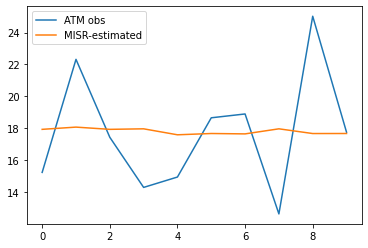

In [7]:
# plot transect
# transect_small["rms"].plot(x=transect_small.index)#, y=transect_small)
# plt.plot(transect_from_misr)

x = transect_small.index
plt.plot(x, transect_small["rms"])
plt.plot(x, transect_from_misr)
plt.legend(["ATM obs","MISR-estimated"])

In [8]:
transect_small.index

RangeIndex(start=0, stop=10, step=1)

In [9]:
transect_from_misr

[17.936515542331403,
 18.07615123740873,
 17.936515542331403,
 17.969362313984306,
 17.595307829924753,
 17.67606097383951,
 17.651999449965285,
 17.969362313984306,
 17.673886373626285,
 17.67606097383951]

## statistics

In [10]:
transect_small.describe()

Unnamed: 0        lat         lon          Ca_r      Cf_r      An_r  \
count    10.00000  10.000000   10.000000  1.000000e+01  10.00000  10.00000   
mean      5.50000  76.235794  230.712513  6.657400e-01   1.03182   0.53599   
std       3.02765   0.000249    0.001647  1.170278e-16   0.00000   0.00000   
min       1.00000  76.235474  230.710186  6.657400e-01   1.03182   0.53599   
25%       3.25000  76.235626  230.711308  6.657400e-01   1.03182   0.53599   
50%       5.50000  76.235775  230.712576  6.657400e-01   1.03182   0.53599   
75%       7.75000  76.235935  230.713030  6.657400e-01   1.03182   0.53599   
max      10.00000  76.236236  230.715193  6.657400e-01   1.03182   0.53599   

            rms  
count  10.00000  
mean   17.72300  
std     3.77318  
min    12.64000  
25%    15.02250  
50%    17.60000  
75%    18.84000  
max    25.02000

## histogram

<AxesSubplot:>

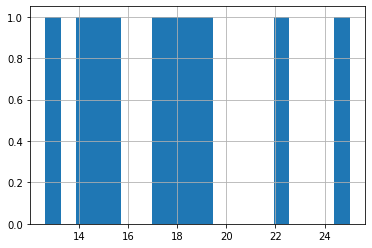

In [11]:
transect_small["rms"].hist(bins=20, alpha=1)